In [1]:
# Install lifelines package
!pip install --user lifelines --upgrade

In [2]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines import CoxPHFitter

In [3]:
# Load the data and peek in the file
data = pd.read_csv("ncdatachallenge-2021-v1.csv")
data.head()

,Unnamed: 0,bmi,age,country,been_pregnant_before,education,sleeping_pattern,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency
0,0,22.942130,31,SE,"No, never",University,Wake same every workday,1,pregnant,0.640000,25.588235,2.526332,True,0.200000
1,1,19.886054,34,NaN,NaN,University,NaN,7,pregnant,0.009569,30.875000,3.522884,True,0.052632
2,2,29.323049,41,SE,"No, never",University,Several times during the night,4,not_pregnant,0.298246,27.666667,2.503331,True,0.149123
3,3,24.386526,27,SE,"No, never",High school,Wake same every workday,2,pregnant,0.895833,24.250000,3.453776,True,0.145833
4,4,29.299971,29,SE,"No, never",Trade/technical/vocational training,Wake same every day,2,pregnant,0.666667,25.466667,0.990430,True,0.254902


In [4]:
nLines,nColumns = data.shape
print("The dataset in input has: %d entried and %d columns"%(nLines, nColumns))

The dataset in input has: 1995 entried and 14 columns


In [5]:
data.dtypes

Unnamed: 0                 int64
bmi                      float64
age                        int64
country                   object
been_pregnant_before      object
education                 object
sleeping_pattern          object
n_cycles_trying            int64
outcome                   object
dedication               float64
average_cycle_length     float64
cycle_length_std         float64
regular_cycle             object
intercourse_frequency    float64
dtype: object

In [6]:
data.isnull().sum()

Unnamed: 0                 0
bmi                        0
age                        0
country                  113
been_pregnant_before     317
education                391
sleeping_pattern         499
n_cycles_trying            0
outcome                    0
dedication                 0
average_cycle_length       6
cycle_length_std          25
regular_cycle              6
intercourse_frequency      0
dtype: int64

In [7]:
# Data manipulation: remove unused column
data = data.drop(columns=['Unnamed: 0'])

In [8]:
# Look into the data that are not object
data.describe()

,bmi,age,n_cycles_trying,dedication,average_cycle_length,cycle_length_std,intercourse_frequency
count,1995.000000,1995.000000,1995.000000,1995.000000,1989.000000,1970.000000,1995.000000
mean,23.357643,31.898747,4.725815,0.475641,30.530185,4.465253,0.106986
std,4.982275,4.063534,4.600871,0.335528,7.010407,8.675280,0.105248
min,0.000000,19.000000,1.000000,0.000000,19.500000,0.000000,0.000000
25%,20.708276,29.000000,1.000000,0.132567,27.176471,1.718249,0.020000
50%,22.530864,32.000000,3.000000,0.505415,29.000000,2.542727,0.080214
75%,25.303154,35.000000,6.000000,0.780816,31.666667,4.272002,0.162195
max,50.611299,44.000000,26.000000,1.347826,145.500000,168.998521,0.793103


Printing plot for var:  bmi
NaN entries = 0 (0.00%)
Printing plot for var:  age
NaN entries = 0 (0.00%)
Printing plot for var:  n_cycles_trying
NaN entries = 0 (0.00%)
Printing plot for var:  dedication
NaN entries = 0 (0.00%)
Printing plot for var:  average_cycle_length
NaN entries = 6 (0.30%)
Printing plot for var:  cycle_length_std
NaN entries = 25 (1.27%)
Printing plot for var:  intercourse_frequency
NaN entries = 0 (0.00%)


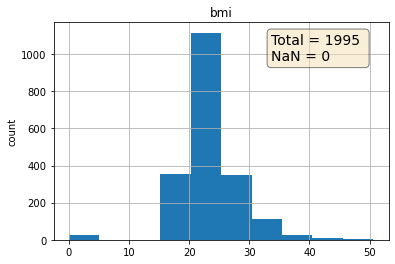

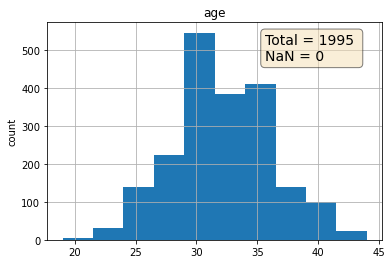

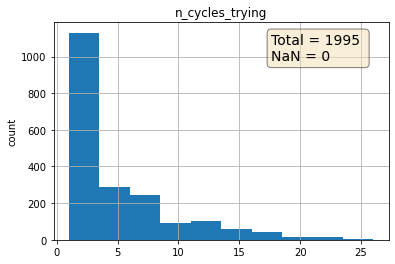

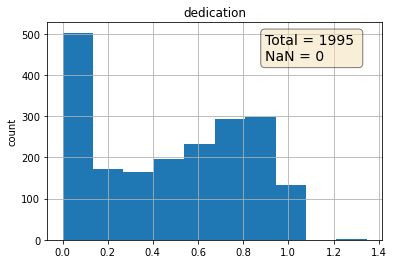

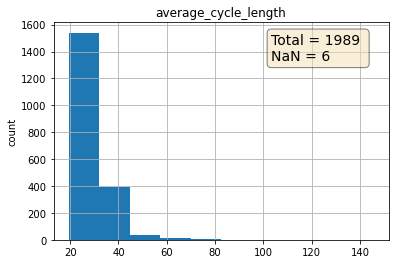

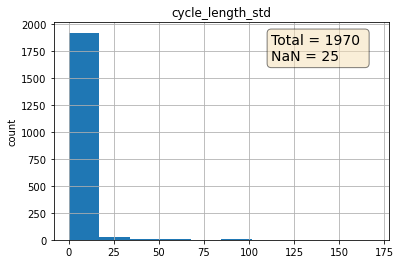

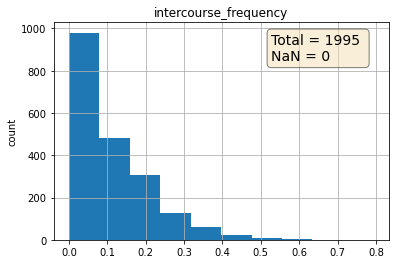

In [9]:
# Plot data with dtype not object and save them in folder
columns_names = list(data.columns)
for var_name in columns_names:
    if(data[var_name].dtype != object):
        print("Printing plot for var: ",var_name)
        plt.figure()
        ax = data[var_name].hist()
        ax.set_ylabel('count')
        
        # Keep track how many values are not valid and give a warning if it deos not match to the total
        tot_entries = data[var_name].value_counts().sum()
        tot_string = "Total = %d"%tot_entries
        nan_entries = data[var_name].isna().sum()
        nan_string = "NaN = %d"%nan_entries
        print("NaN entries = %s (%.2f%%)"%(nan_entries,nan_entries/tot_entries*100))
        if((tot_entries+nan_entries) != nLines):
            print("WARNING: Some entries are not valid and not classifies as NaN")

        text_string = "%s \n%s"%(tot_string,nan_string)
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

        # place a text box in upper left in axes coords
        ax.text(0.65, 0.95, text_string, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
        
        ax.set_title(var_name)
        plt.savefig("variables/"+var_name+".pdf")

In [10]:
# Look into the data with dtype = object 
data.describe(include=object)

,country,been_pregnant_before,education,sleeping_pattern,outcome,regular_cycle
count,1882,1678,1604,1496,1995,1989
unique,34,4,5,5,2,2
top,SE,"No, never",University,Wake same every workday,pregnant,True
freq,612,1202,1089,808,1148,1569


['bmi', 'age', 'country', 'been_pregnant_before', 'education', 'sleeping_pattern', 'n_cycles_trying', 'outcome', 'dedication', 'average_cycle_length', 'cycle_length_std', 'regular_cycle', 'intercourse_frequency']
Printing plot for var:  country
NaN entries = 113 (6.00%)
Printing plot for var:  been_pregnant_before
NaN entries = 317 (18.89%)
Printing plot for var:  education
NaN entries = 391 (24.38%)
Printing plot for var:  sleeping_pattern
NaN entries = 499 (33.36%)
Printing plot for var:  outcome
NaN entries = 0 (0.00%)
Printing plot for var:  regular_cycle
NaN entries = 6 (0.30%)


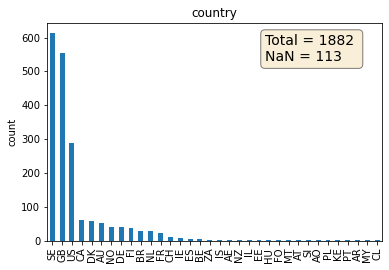

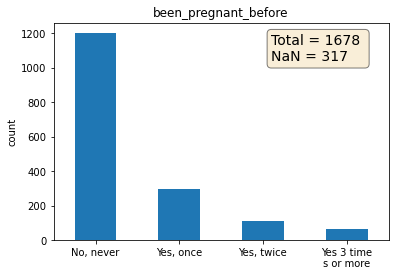

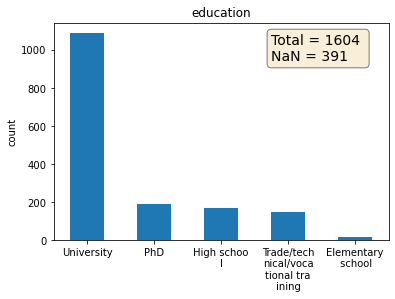

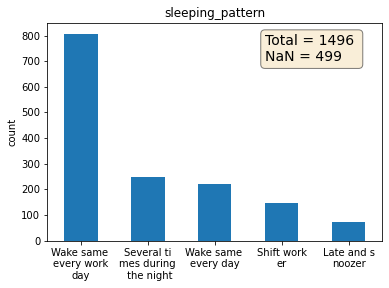

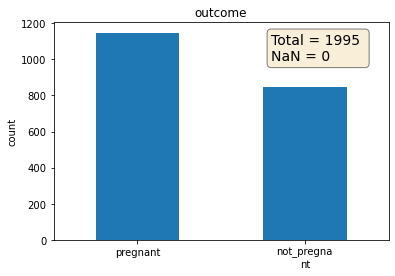

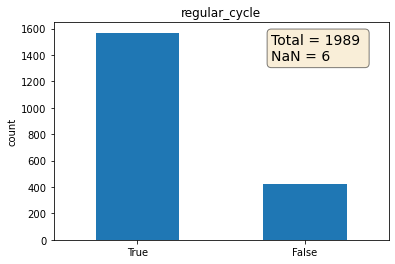

In [11]:
# Plot data with dtype = object and save them in folder
columns_names = list(data.columns)
print(columns_names)
var_axes_not_rotated = ["country"]
for var_name in columns_names:
    if(data[var_name].dtype == object):
        print("Printing plot for var: ",var_name)
        plt.figure()

        ax = data[var_name].value_counts().plot(kind="bar")
        ax.set_title(var_name)
        ax.set_ylabel('count')

        # Keep track how many values are not valid and give a warning if it deos not match to the total
        tot_entries = data[var_name].value_counts().sum()
        tot_string = "Total = %d"%tot_entries
        nan_entries = data[var_name].isna().sum()
        nan_string = "NaN = %d"%nan_entries
        print("NaN entries = %s (%.2f%%)"%(nan_entries,nan_entries/tot_entries*100))
        if((tot_entries+nan_entries) != nLines):
            print("WARNING: Some entries are not valid and not classifies as NaN")

        text_string = "%s \n%s"%(tot_string,nan_string)
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

        # place a text box in upper left in axes coords
        ax.text(0.65, 0.95, text_string, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
        plt.xticks(rotation = 0)
        if var_name in var_axes_not_rotated:
            plt.xticks(rotation = 90)

        # Crop x-axis label if too long
        max_chars = 10
        new_labels = ['\n'.join(label._text[i:i + max_chars ] for i in range(0, len(label._text), max_chars )) for label in ax.get_xticklabels()]
        ax.set_xticklabels(new_labels)

        plt.savefig("variables/"+var_name+".pdf")

In [12]:
# Data manipulation: categorical data
columns_names = list(data.columns)
for var_name in columns_names:
    if(data[var_name].dtype == object and var_name != "outcome" and  var_name != "regular_cycle"):
        substring_var_name = var_name[:2]
        print("Create : ",var_name, substring_var_name)
        dummies_category = pd.get_dummies(data[var_name], prefix = substring_var_name)
        data = pd.concat([data, dummies_category], axis = 1)
        data = data.drop(var_name, axis = 1)

Create :  country co
Create :  been_pregnant_before be
Create :  education ed
Create :  sleeping_pattern sl


In [13]:
# Data manipulation: change bool into 0 or 1 (including outcome)
data["outcome"] = data["outcome"].replace("pregnant", 1)
data["outcome"] = data["outcome"].replace("not_pregnant", 0)
data.replace({False: 0, True: 1}, inplace=True)
data.head()

,bmi,age,n_cycles_trying,outcome,dedication,average_cycle_length,cycle_length_std,regular_cycle,intercourse_frequency,co_AE,...,ed_Elementary school,ed_High school,ed_PhD,ed_Trade/technical/vocational training,ed_University,sl_Late and snoozer,sl_Several times during the night,sl_Shift worker,sl_Wake same every day,sl_Wake same every workday
0,22.942130,31,1,1,0.640000,25.588235,2.526332,1.0,0.200000,0,...,0,0,0,0,1,0,0,0,0,1
1,19.886054,34,7,1,0.009569,30.875000,3.522884,1.0,0.052632,0,...,0,0,0,0,1,0,0,0,0,0
2,29.323049,41,4,0,0.298246,27.666667,2.503331,1.0,0.149123,0,...,0,0,0,0,1,0,1,0,0,0
3,24.386526,27,2,1,0.895833,24.250000,3.453776,1.0,0.145833,0,...,0,1,0,0,0,0,0,0,0,1
4,29.299971,29,2,1,0.666667,25.466667,0.990430,1.0,0.254902,0,...,0,0,0,1,0,0,0,0,1,0


In [14]:
# Data manipulation: replace NaN with average for average_cycle_length and cycle_length_std
data["average_cycle_length"].fillna(data["average_cycle_length"].mean(), inplace = True)
data["cycle_length_std"].fillna(data["cycle_length_std"].mean(), inplace = True)

In [15]:
# Data manipulation: Drop the remaining 6 entries with regular cycle not defined
data.dropna(inplace=True)
nLines,nColumns = data.shape
print("The dataset now has: %d entries and %d columns"%(nLines, nColumns))

The dataset now has: 1989 entries and 57 columns


1146 tot entries are pregnant and 843 tot entries not_pregnant


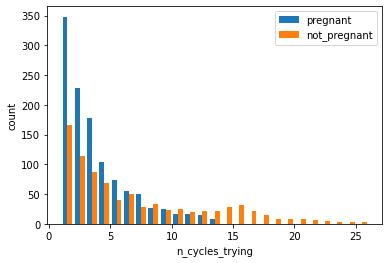

In [16]:
# Visualize the n_cycles_trying distrib for pregnant & not_pregnant
# not_pregnant: An unsuccessful attempt to conceive ends with the woman resuming contraception, or interrupting the usage of NC

data_pregnant = data[data["outcome"]==1]
data_not_pregnant = data[data["outcome"]==0]
print("%d tot entries are pregnant and %d tot entries not_pregnant"%(data_pregnant.shape[0], data_not_pregnant.shape[0]))

fig, ax = plt.subplots(1, 1)
_ = ax.hist((data_pregnant["n_cycles_trying"], data_not_pregnant["n_cycles_trying"]), bins=25)
ax.set_xlabel('n_cycles_trying')
ax.set_ylabel('count')
ax.legend(('pregnant', 'not_pregnant'), loc='upper right');
plt.savefig("analysis/ncycles_pregnant.pdf")

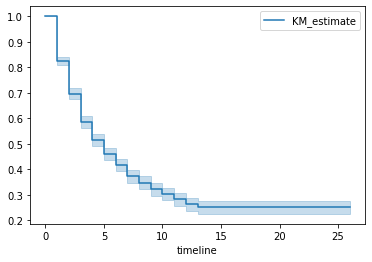

In [17]:
# The curve illustrates how the survival probabilities changes over the time horizon.  
# As the time passes, the probabilities of not getting pregnant reduces.

T = data["n_cycles_trying"]
E = data["outcome"]

kmf = KaplanMeierFitter()
kmf.fit(durations = T, event_observed = E)
ax = kmf.plot_survival_function()
ax.get_figure().savefig("analysis/kmf_survival_function.pdf")

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26.]
[0.         0.17496229 0.30313979 0.41281364 0.48341177 0.53857415
 0.58320255 0.62726148 0.65273981 0.67865475 0.69663211 0.71644389
 0.7367948  0.74903691 0.74903691 0.74903691 0.74903691 0.74903691
 0.74903691 0.74903691 0.74903691 0.74903691 0.74903691 0.74903691
 0.74903691 0.74903691 0.74903691]
Change getting pregnant within 13 cycles = 74.90%


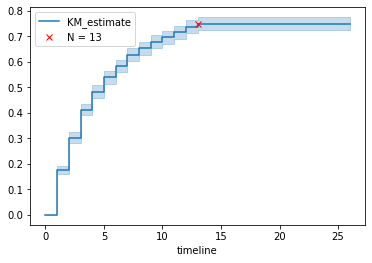

In [18]:
ax = kmf.plot_cumulative_density()
line = ax.lines[0]

nCycle = 13
xd = line.get_xdata()
yd = line.get_ydata()
print(xd)
print(yd)
print("Change getting pregnant within 13 cycles = %.2f%%"%(yd[nCycle]*100))
plt.plot([nCycle], [yd[nCycle]], 'x', color="red", label="N = 13") 
plt.legend() 
ax.get_figure().savefig("analysis/kmf_cumulative_density.pdf")

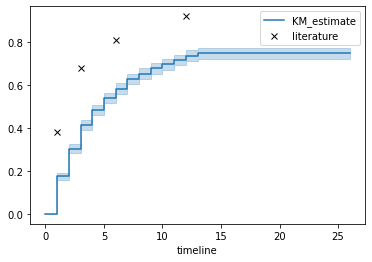

In [19]:
ax = kmf.plot_cumulative_density()
line = ax.lines[0]
ax.get_figure().savefig("analysis/kmf_cumulative_density.pdf")

plt.plot([1, 3, 6, 12], [0.38, 0.68, 0.81, 0.92], 'x', color="black", label="literature") 
plt.legend() 
ax.get_figure().savefig("analysis/kmf_cumulative_density_literature.pdf")

In [20]:
# Time to usually get pregnant using the median survival time
median_ = kmf.median_survival_time_
median_confidence_interval_ = median_survival_times(kmf.confidence_interval_)
print("The usual time to get pregnant according to the data is %d months"%median_)
print("with 95%% CI level of [%.2f, %.2f]"%(median_confidence_interval_["KM_estimate_lower_0.95"], median_confidence_interval_["KM_estimate_upper_0.95"]))

The usual time to get pregnant according to the data is 5 months
with 95% CI level of [4.00, 5.00]


In [21]:
# Cox Proportional Hazard Model
#from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(data, duration_col = "n_cycles_trying", event_col = "outcome")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1989 total observations, 843 right-censored observations>
             duration col = 'n_cycles_trying'
                event col = 'outcome'
      baseline estimation = breslow
   number of observations = 1989
number of events observed = 1146
   partial log-likelihood = -7700.47
         time fit was run = 2023-11-24 12:25:51 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                      
bmi                                      0.01       1.01       0.01            -0.01             0.02                 0.99                 1.02
age                                     -0.05       0.95       0.01            -0.06            -0.03                 0.94                 0.97
dedication                               1.42       4.13       0.12             1.19             1.65                 3.29                 5.19
average_cycle_length                     0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
cycle_length_std                        -0.03       0.97       0.01            -0.05            -0.01                 0.95                 0.99
regular_cycle                            0.12       1.13       0.10            -0.08             0.32                 0.92                 1.37
intercourse_frequency                    2.70      14.82       0.31             2.09             3.30                 8.09                27.16
co_AE                                    0.89       2.45       0.73            -0.53             2.32                 0.59                10.14
co_AO                                    0.35       1.43       1.02            -1.64             2.34                 0.19                10.42
co_AR                                  -13.70       0.00    1596.45         -3142.68          3115.27                 0.00                  inf
co_AT                                  -14.06       0.00    1014.54         -2002.53          1974.41                 0.00                  inf
co_AU                                    0.26       1.30       0.23            -0.20             0.72                 0.82                 2.05
co_BE                                    1.14       3.14       0.61            -0.04             2.33                 0.96                10.27
co_BR                                    0.20       1.22       0.31            -0.41             0.81                 0.66                 2.25
co_CA                                   -0.16       0.85       0.22            -0.60             0.28                 0.55                 1.33
co_CH                                   -0.12       0.89       0.47            -1.04             0.80                 0.35                 2.23
co_CL                                    2.25       9.45       1.02             0.24             4.25                 1.28                70.00
co_DE                                    0.06       1.06       0.28            -0.48             0.60                 0.62                 1.83
co_DK                                    0.29       1.34       0.23            -0.16             0.75                 0.85                 2.11
co_EE                                    0.48       1.61       0.60            -0.70             1.66                 0.49                 5.26
co_ES                                    0.01       1.01       0.72            -1.41             1.43                 0.25                 4.19
co_FI                                    0.20       1.23       0.26            -0.31             0.72                 0.74                 2.05
co_FO                                   -0.38       0.68       1.08            -2.49             1.73                 0.08                 5.62
co_FR                     

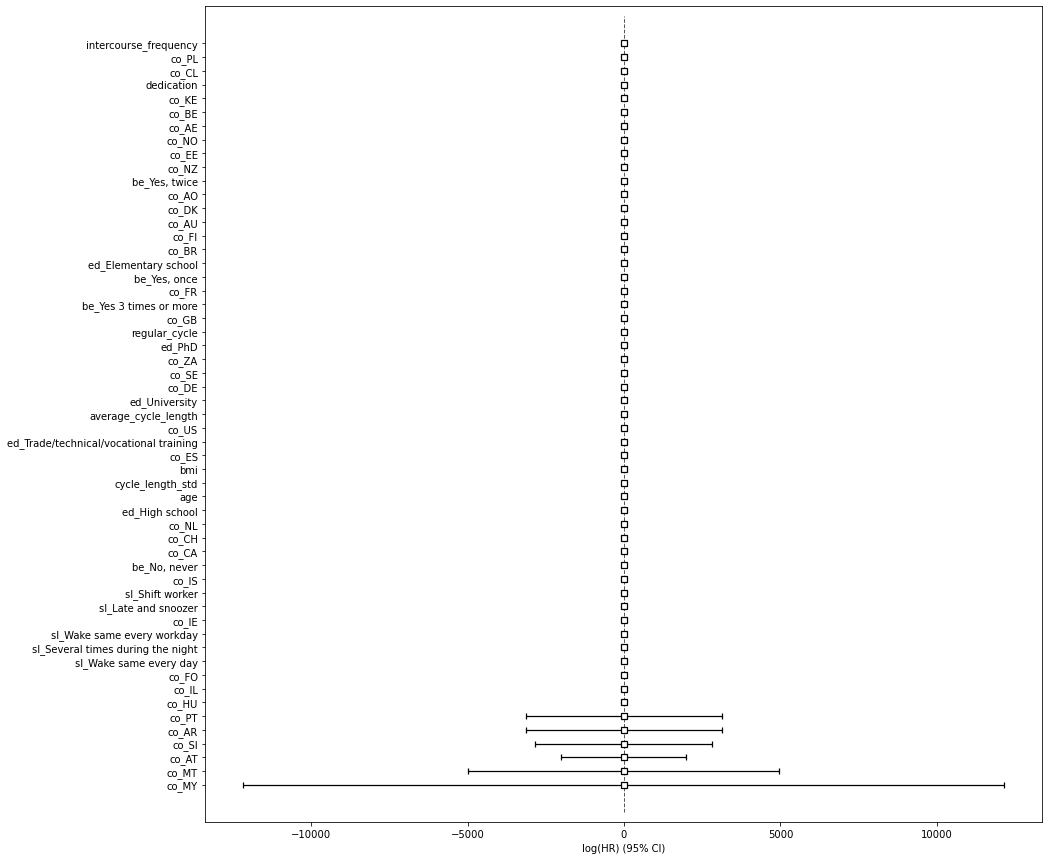

In [22]:
plt.subplots(figsize = (15, 15))
ax = cph.plot()
ax.get_figure().savefig("analysis/cox_corr.pdf")

In [23]:
# Here I am re-fitting including only the variables with min entries of 20
tot_entries_per_covariate = data.astype(bool).sum(axis=0)
covariates_dropped = []
min_total_occurrences = 20  # Adjust as needed

for i in range(0, len(tot_entries_per_covariate)-1):
    if(tot_entries_per_covariate.iloc[i]<=min_total_occurrences):
        covariates_dropped.append(tot_entries_per_covariate.index[i])
print("Filtering the following variables:",covariates_dropped)

filtered_data = data.drop(columns=covariates_dropped)
print("The filtered dataset has: %d entried and %d columns"%(filtered_data.shape[0], filtered_data.shape[1]))

Filtering the following variables: ['co_AE', 'co_AO', 'co_AR', 'co_AT', 'co_BE', 'co_CH', 'co_CL', 'co_EE', 'co_ES', 'co_FO', 'co_HU', 'co_IE', 'co_IL', 'co_IS', 'co_KE', 'co_MT', 'co_MY', 'co_NZ', 'co_PL', 'co_PT', 'co_SI', 'co_ZA', 'ed_Elementary school']
The filtered dataset has: 1989 entried and 34 columns


In [24]:
filtered_cph = CoxPHFitter()
filtered_cph.fit(filtered_data, duration_col = "n_cycles_trying", event_col = "outcome")
filtered_cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1989 total observations, 843 right-censored observations>
             duration col = 'n_cycles_trying'
                event col = 'outcome'
      baseline estimation = breslow
   number of observations = 1989
number of events observed = 1146
   partial log-likelihood = -7710.91
         time fit was run = 2023-11-24 12:25:53 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                      
bmi                                      0.00       1.00       0.01            -0.01             0.02                 0.99                 1.02
age                                     -0.05       0.95       0.01            -0.06            -0.03                 0.94                 0.97
dedication                               1.41       4.08       0.11             1.18             1.63                 3.26                 5.11
average_cycle_length                     0.03       1.03       0.01             0.01             0.05                 1.01                 1.05
cycle_length_std                        -0.03       0.97       0.01            -0.05            -0.01                 0.95                 0.99
regular_cycle                            0.10       1.10       0.10            -0.10             0.29                 0.91                 1.34
intercourse_frequency                    2.68      14.58       0.30             2.08             3.28                 8.03                26.47
co_AU                                    0.27       1.31       0.22            -0.16             0.69                 0.85                 2.00
co_BR                                    0.21       1.23       0.30            -0.38             0.80                 0.68                 2.23
co_CA                                   -0.15       0.86       0.21            -0.55             0.26                 0.57                 1.30
co_DE                                    0.06       1.06       0.26            -0.45             0.58                 0.63                 1.78
co_DK                                    0.30       1.35       0.21            -0.12             0.72                 0.88                 2.05
co_FI                                    0.21       1.23       0.25            -0.28             0.69                 0.76                 1.99
co_FR                                    0.15       1.17       0.31            -0.46             0.77                 0.63                 2.15
co_GB                                    0.15       1.16       0.12            -0.10             0.39                 0.91                 1.48
co_NL                                   -0.08       0.92       0.28            -0.62             0.46                 0.54                 1.58
co_NO                                    0.52       1.68       0.22             0.08             0.96                 1.08                 2.61
co_SE                                    0.08       1.09       0.12            -0.16             0.33                 0.85                 1.39
co_US                                    0.05       1.05       0.14            -0.22             0.31                 0.80                 1.37
be_No, never                            -0.15       0.86       0.10            -0.34             0.04                 0.71                 1.04
be_Yes 3 times or more                   0.15       1.16       0.21            -0.25             0.55                 0.78                 1.74
be_Yes, once                             0.19       1.21       0.12            -0.04             0.42                 0.96                 1.52
be_Yes, twice                            0.36       1.44       0.15             0.06             0.66                 1.07                 1.93
ed_High school            

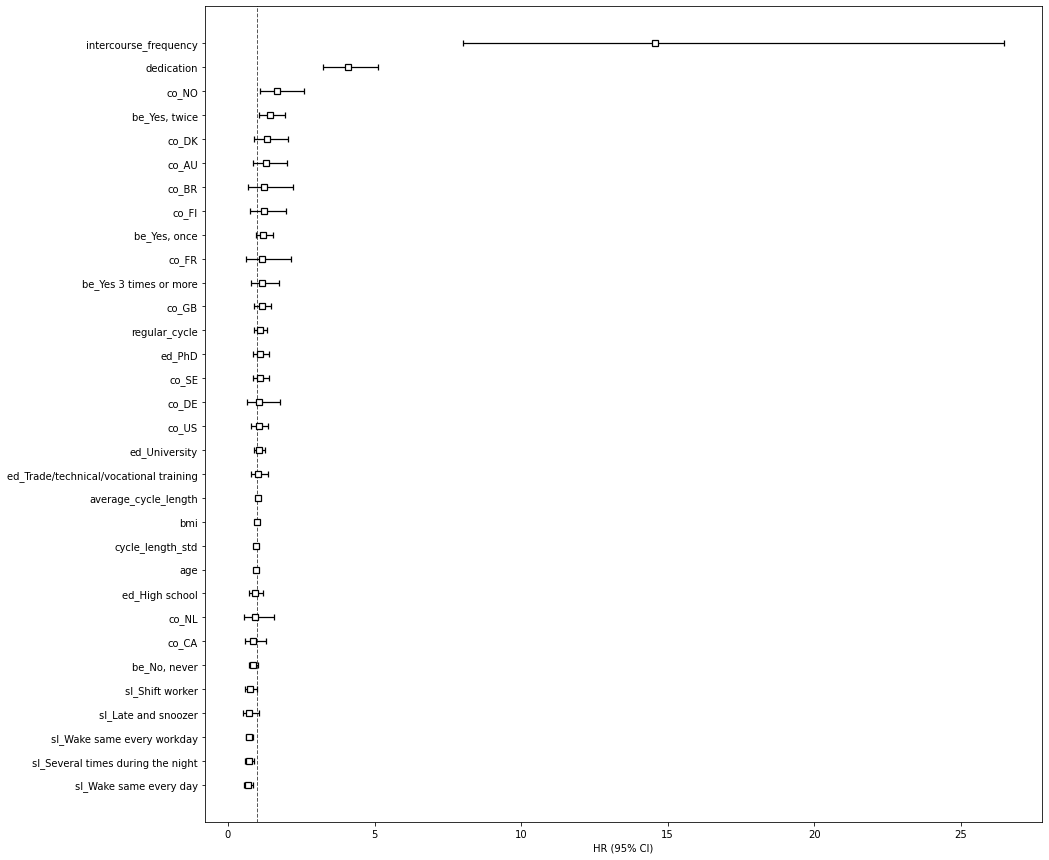

In [25]:
plt.subplots(figsize = (15, 15))
ax = filtered_cph.plot(hazard_ratios=True)
ax.get_figure().savefig("analysis/cox_corr_filtered.pdf")

In [26]:
# Sort results by coef and print them in a latex table 
results = filtered_cph.summary
results_sorted = results.sort_values(['exp(coef)'], key=abs, ascending=False)
results_short = results_sorted.drop(columns=["se(coef)","z", "p", "cmp to", "-log2(p)", "coef lower 95%", "coef upper 95%"])
print(results_short.to_latex(float_format="{:0.2f}".format))

\begin{tabular}{lrrrr}
\toprule
{} &  coef &  exp(coef) &  exp(coef) lower 95\% &  exp(coef) upper 95\% \\
covariate                              &       &            &                      &                      \\
\midrule
intercourse\_frequency                  &  2.68 &      14.58 &                 8.03 &                26.47 \\
dedication                             &  1.41 &       4.08 &                 3.26 &                 5.11 \\
co\_NO                                  &  0.52 &       1.68 &                 1.08 &                 2.61 \\
be\_Yes, twice                          &  0.36 &       1.44 &                 1.07 &                 1.93 \\
co\_DK                                  &  0.30 &       1.35 &                 0.88 &                 2.05 \\
co\_AU                                  &  0.27 &       1.31 &                 0.85 &                 2.00 \\
co\_BR                                  &  0.21 &       1.23 &                 0.68 &                 2.23 \\
co\_FI

/tmp/ipykernel_1044/2724935746.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(results_short.to_latex(float_format="{:0.2f}".format))


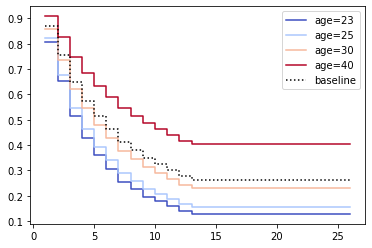

In [27]:
# survival probability -> probability of not becoming pregnant
ax = cph.plot_partial_effects_on_outcome(covariates = 'age', values = [23, 25, 30, 40], cmap = 'coolwarm')
ax.get_figure().savefig("analysis/cox_part_effect_age.pdf")

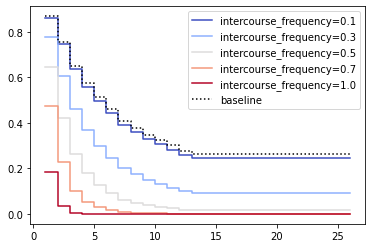

In [28]:
ax = cph.plot_partial_effects_on_outcome(covariates = 'intercourse_frequency', values = [0.1, 0.3, 0.5, 0.7, 1.0], cmap = 'coolwarm')
ax.get_figure().savefig("analysis/cox_part_effect_intercourse.pdf")

Average probability is 10.00%

Probability at cycle 13 is 74.57%


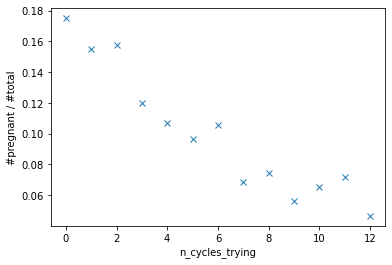

In [29]:
# Extra: Personal remarks

# Produce the two histograms per cycle
val_of_bins_pregnant, edges_of_bins_pregnant, patches_pregnant = ax.hist(data_pregnant["n_cycles_trying"], bins=data_pregnant["n_cycles_trying"].max())
val_of_bins_tot, edges_of_bins_tot, patches_tot = ax.hist(data["n_cycles_trying"], bins=data["n_cycles_trying"].max())

# Sum the future users
denom = []
for n_cycle in range(0, data_pregnant["n_cycles_trying"].max()):
    sum_cycle = sum(val_of_bins_tot[n_cycle:]) 
    denom.append(sum_cycle)
    
# Divide the two histos
ratio = np.divide(val_of_bins_pregnant, denom)

# # Plot the ratio
fig, ax = plt.subplots(1, 1)
ax.plot(ratio, "x")
ax.set_ylabel('#pregnant / #total')
ax.set_xlabel('n_cycles_trying')
plt.savefig("analysis/binomial_prob_tot.pdf")

average_prob = np.average(ratio)
print("Average probability is %.2f%%\n"%(average_prob*100))
p_at_least = 1 - np.power(1-average_prob, 13)
print("Probability at cycle %d is %.2f%%"%(13,p_at_least*100))

Mean = 2.56
Median = 1.77


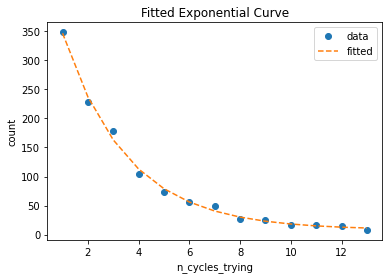

In [30]:
# Extra: Personal remarks

# Assume that probability distribution of the time between events can be described by an exponential distribution
from scipy.stats import chisquare

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

ydata = val_of_bins_pregnant
xdata = np.arange(1,data_pregnant["n_cycles_trying"].max()+1)
plt.plot(xdata, ydata, 'o', label='data')

p0 = (300, 0.5, 10) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp, xdata, ydata, p0)
m, t, b = params
plt.plot(xdata, monoExp(xdata, m, t, b), '--', label="fitted")
plt.title("Fitted Exponential Curve")
plt.xlabel("n_cycles_trying")
plt.ylabel("count")
plt.legend() 
plt.savefig("analysis/poissonian.pdf")

# inspect the parameters
mean = 1./t
median = np.log(2)/t
print("Mean = %.2f"%(mean))
print("Median = %.2f"%(median))